In [41]:
%pip install rasterio
%pip install shapely
%pip install matplotlib
%pip install pandas
%pip install geopandas
%pip install rasterstats
%pip install h3pandas

import pandas as pd
import geopandas as gpd
import rasterio
import shapely
import matplotlib as plt
import rasterstats as rs
import h3pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
#Define rasters
travis_hand_inv = rasterio.open(r"C:/SPRING2025/SOAR/pythoninputs/travis_hand_inv.tif")
bp = rasterio.open(r"C:/SPRING2025/SOAR/pythoninputs/BP_TX.tif")
bp_flep = rasterio.open(r"C:\SPRING2025\SOAR/pythoninputs/bp_flep8_UCA.tif")
svi = rasterio.open(r"C:\SPRING2025\SOAR/pythoninputs/svi_raster.tif")

In [39]:
#Define LMA points and Travis County boundary
lma = gpd.GeoDataFrame.from_file(r"C:/SPRING2025/SOAR/pythoninputs/lib_mus_arch.shp")
travis = gpd.GeoDataFrame.from_file(r"C:/SPRING2025/SOAR/pythoninputs/travis.shp")

In [34]:
lma_buf = lma.buffer(60)
print(lma_buf)
#how to assign attributes of points to buffer -> Ask Alex

0      POLYGON ((-191600.731 814518.919, -191601.02 8...
1      POLYGON ((-190445.19 821676.049, -190445.479 8...
2      POLYGON ((-189899.666 836511.647, -189899.955 ...
3      POLYGON ((-190218.83 811817.198, -190219.119 8...
4      POLYGON ((-189399.303 809506.746, -189399.592 ...
                             ...                        
175    POLYGON ((-157649.55 784457.648, -157649.839 7...
176    POLYGON ((-156093.213 819749.729, -156093.502 ...
177    POLYGON ((-155880.4 804015.716, -155880.689 80...
178    POLYGON ((-151364.491 799622.756, -151364.78 7...
179    POLYGON ((-150005.377 791433.54, -150005.666 7...
Length: 180, dtype: geometry


<bound method NDFrame.head of 0      POLYGON ((-191600.731 814518.919, -191601.02 8...
1      POLYGON ((-190445.19 821676.049, -190445.479 8...
2      POLYGON ((-189899.666 836511.647, -189899.955 ...
3      POLYGON ((-190218.83 811817.198, -190219.119 8...
4      POLYGON ((-189399.303 809506.746, -189399.592 ...
                             ...                        
175    POLYGON ((-157649.55 784457.648, -157649.839 7...
176    POLYGON ((-156093.213 819749.729, -156093.502 ...
177    POLYGON ((-155880.4 804015.716, -155880.689 80...
178    POLYGON ((-151364.491 799622.756, -151364.78 7...
179    POLYGON ((-150005.377 791433.54, -150005.666 7...
Length: 180, dtype: geometry>

<Axes: >

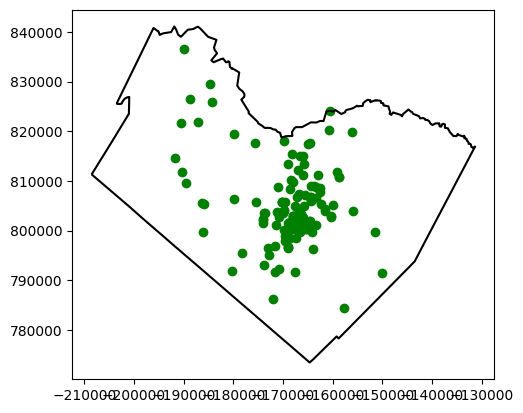

In [32]:
ax = travis.boundary.plot(color="black")
lma.plot(ax=ax, color="green")

In [26]:
#Zonal Statistics on buffers
from rasterstats import zonal_stats
zs_bp = zonal_stats(lma_buf, bp)
zs_svi = zonal_stats(lma_buf, svi)
zs_hand = zonal_stats(lma_buf, travis_hand_inv)

TypeError: invalid path or file: <open DatasetReader name='C:/SPRING2025/SOAR/pythoninputs/BP_TX.tif' mode='r'>

In [ ]:
#Join ZS outputs to LMA gdf

In [42]:
#Create H3 polygons / Assign points to H3 based on POP
h3_8 = travis.h3.geo_to_h3(8)



ValueError: x attribute access only provided for Point geometries

In [ ]:
#showing H3 on map

ax = travis.boundary.plot(color="black")
h3_8.plot(color = "blue")
lma.plot(ax=ax, color="green")

In [ ]:
#Conditional statement for H3-LMA aggregation
#If H3-8 overlaps H3-7, run as 1; else, run
#Need to figure out how to identify 

In [ ]:
#Summarize Within for H3 and LMA